In [9]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Import your dataset and utility functions
import splitting.dataset as dataset
import utils

# Set the same parameters as your training script
BATCH_SIZE = 12
SPLIT_INDEX = 1
NORMALIZE = True
AUGMENTATION = 4

# Define Transformations
flipHorVer = dataset.RandomFlip()
flipLR = dataset.RandomFlipLeftRight()
rot90 = dataset.RandomRot90()
scale = dataset.RandomScale()
noise = dataset.RandomNoise()

if AUGMENTATION == 0:
    transform = None
elif AUGMENTATION == 1:
    transform = transforms.Compose([flipHorVer])
elif AUGMENTATION == 2:
    transform = transforms.Compose([rot90])
elif AUGMENTATION == 3:
    transform = transforms.Compose([flipLR])
elif AUGMENTATION == 12:
    transform = transforms.Compose([flipHorVer, rot90])
elif AUGMENTATION == 4:
    transform = transforms.Compose([scale])
elif AUGMENTATION == 5:
    transform = transforms.Compose([noise])
elif AUGMENTATION == 14:
    transform = transforms.Compose([flipHorVer, scale])
elif AUGMENTATION == 34:
    transform = transforms.Compose([flipLR, scale])
elif AUGMENTATION == 45:
    transform = transforms.Compose([scale, noise])

# Load dataset
train_dset, trainval_dset, val_dset, _, balance_weight_neg_pos = dataset.get_datasets_singleview(
    transform, NORMALIZE, False, SPLIT_INDEX)

train_loader = torch.utils.data.DataLoader(train_dset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

# Print dataset info
print(f"Training set size: {len(train_dset.df)}")
print(f"Validation set size: {len(val_dset.df)}")
print(f"Class balance: No Tumor={balance_weight_neg_pos[0]}, Tumor={balance_weight_neg_pos[1]}")


Training set size: 2014
Validation set size: 464
Class balance: No Tumor=0.2032828282828283, Tumor=0.7967171717171717


Image batch shape: torch.Size([12, 1, 310, 310])


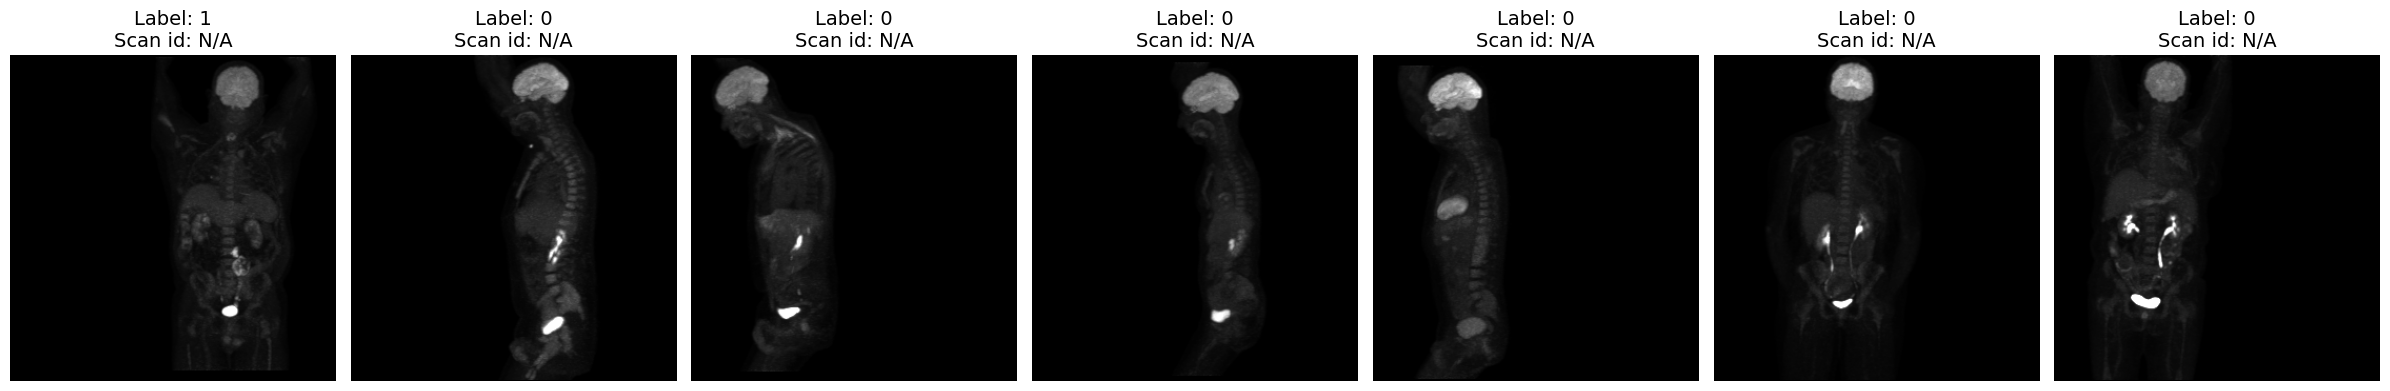

In [12]:
def visualize_batch(loader):
    """Visualizes one batch of images from the DataLoader and inspects detailed statistics for random images."""
    dataiter = iter(loader)
    batch = next(dataiter)
    
    # Expecting (images, labels, scan_ids). If not, adjust accordingly.
    if len(batch) == 3:
        images, labels, scan_ids = batch
    else:
        images, labels = batch
        scan_ids = ["N/A"] * images.size(0)
    
    print(f"Image batch shape: {images.shape}")  # Expected: (batch_size, channels, height, width)
    
    # Convert tensor to NumPy format (assuming images are in CxHxW format)
    images_np = images.cpu().numpy().transpose((0, 2, 3, 1))  # Now (batch, height, width, channels)
    
    # Plot a row of images with labels and scan ids.
    num_to_show = min(len(images_np), 7)
    fig, axes = plt.subplots(1, num_to_show, figsize=(24, 12))
    if num_to_show == 1:
        axes = [axes]  # Ensure axes is iterable.
        
    for i in range(num_to_show):
        # Extract label as a scalar
        if isinstance(labels, torch.Tensor):
            if labels.dim() > 1:
                label_val = labels[i, 0].item()  # For example, if labels is (batch_size, 1)
            else:
                label_val = labels[i].item()
        else:
            label_val = labels[i]
        
        title_str = f"Label: {label_val}\nScan id: {scan_ids[i]}"
        # If the image is grayscale (channel=1), squeeze the channel.
        img_to_show = images_np[i].squeeze() if images_np[i].shape[-1] == 1 else images_np[i]
        axes[i].imshow(img_to_show, cmap="gray" if img_to_show.ndim == 2 else None)
        axes[i].axis("off")
        axes[i].set_title(title_str, fontsize=14)

    
    plt.tight_layout()
    plt.show()
    
    # # For detailed inspection, randomly select one or two images from the batch.
    # num_details = min(5, len(images_np))
    # indices = np.random.choice(len(images_np), size=num_details, replace=False)
    
    # for idx in indices:
    #     img = images_np[idx]
    #     # Squeeze channel if it's 1-channel.
    #     if img.shape[-1] == 1:
    #         img = img.squeeze(-1)
    #     img_mean = np.mean(img)
    #     img_std = np.std(img)
    #     img_shape = img.shape
        
    #     print(f"\nDetailed statistics for Scan id: {scan_ids[idx]}")
    #     print(f"Image shape: {img_shape}")
    #     print(f"Mean pixel value: {img_mean:.3f}")
    #     print(f"Standard deviation: {img_std:.3f}")
        
    #     # Plot the histogram of pixel intensities.
    #     plt.figure(figsize=(8, 4))
    #     plt.hist(img.ravel(), bins=50, color='blue', alpha=0.7)
    #     plt.title(f"Histogram for Scan id: {scan_ids[idx]}")
    #     plt.xlabel("Pixel intensity")
    #     plt.ylabel("Frequency")
    #     plt.show()

# Call the function to visualize images and inspect detailed statistics.
visualize_batch(train_loader)

Training set size: 2014
Validation set size: 464
Class balance: No Tumor=0.2032828282828283, Tumor=0.7967171717171717


Image batch shape: torch.Size([12, 1, 310, 310])


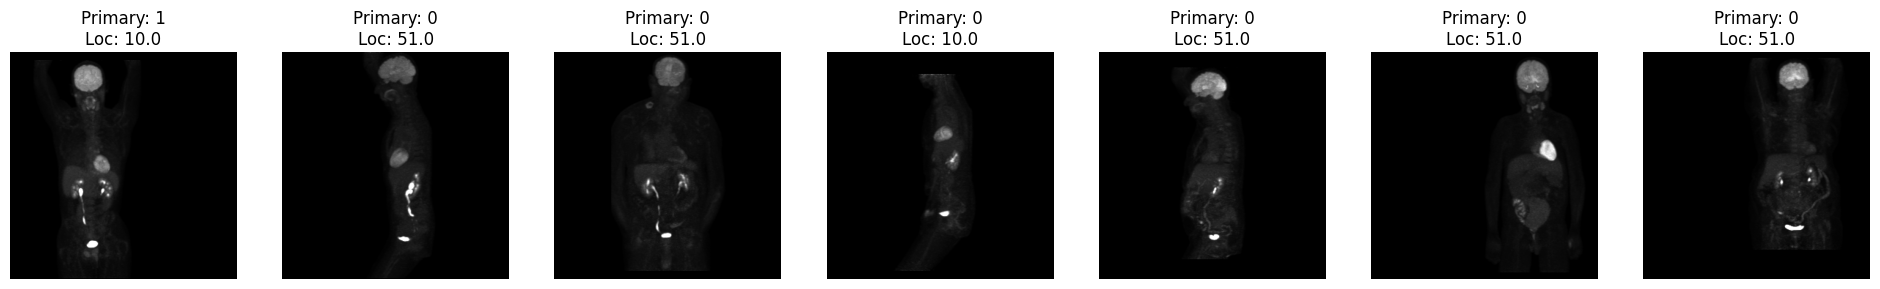

In [8]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Import the new dataset module that returns both targets.
import splitting.dataset_loca as dataset
import utils

# For augmentations, we import them from the original dataset module.
from splitting.dataset import RandomFlip, RandomFlipLeftRight, RandomRot90, RandomScale, RandomNoise

# Set parameters.
BATCH_SIZE = 12
SPLIT_INDEX = 1
NORMALIZE = True
AUGMENTATION = 4

# Define transformations.
flipHorVer = RandomFlip()
flipLR = RandomFlipLeftRight()
rot90 = RandomRot90()
scale = RandomScale()
noise = RandomNoise()

if AUGMENTATION == 0:
    transform = None
elif AUGMENTATION == 1:
    transform = transforms.Compose([flipHorVer])
elif AUGMENTATION == 2:
    transform = transforms.Compose([rot90])
elif AUGMENTATION == 3:
    transform = transforms.Compose([flipLR])
elif AUGMENTATION == 12:
    transform = transforms.Compose([flipHorVer, rot90])
elif AUGMENTATION == 4:
    transform = transforms.Compose([scale])
elif AUGMENTATION == 5:
    transform = transforms.Compose([noise])
elif AUGMENTATION == 14:
    transform = transforms.Compose([flipHorVer, scale])
elif AUGMENTATION == 34:
    transform = transforms.Compose([flipLR, scale])
elif AUGMENTATION == 45:
    transform = transforms.Compose([scale, noise])

# Load dataset using the new helper function that returns both targets.
train_dset, trainval_dset, val_dset, _, balance_weight_neg_pos = dataset.get_datasets_singleview_withLoca(
    transform, NORMALIZE, False, SPLIT_INDEX)

train_loader = torch.utils.data.DataLoader(train_dset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

# Print dataset info.
print(f"Training set size: {len(train_dset.df)}")
print(f"Validation set size: {len(val_dset.df)}")
print(f"Class balance: No Tumor={balance_weight_neg_pos[0]}, Tumor={balance_weight_neg_pos[1]}")

def visualize_batch(loader):
    """Visualizes one batch of images and displays both the primary and localization targets."""
    dataiter = iter(loader)
    images, targets = next(dataiter)
    # Unpack targets: expect a tuple (primary_target, localization_target)
    primary_targets, loc_targets = targets
    print(f"Image batch shape: {images.shape}")  # Expected: (batch_size, channels, height, width)
    
    # Convert tensor to NumPy array and transpose from (B,C,H,W) to (B,H,W,C).
    images = images.numpy().transpose((0, 2, 3, 1))
    
    # If images are grayscale (channel == 1), squeeze the channel dimension.
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    
    num_imgs = min(len(images), 7)
    fig, axes = plt.subplots(1, num_imgs, figsize=(24, 12))
    if num_imgs == 1:
        axes = [axes]  # Ensure axes is iterable.
    
    for i in range(num_imgs):
        axes[i].imshow(images[i], cmap="gray")
        axes[i].axis("off")
        # Display both targets in the title.
        axes[i].set_title(f"Primary: {primary_targets[i].item()}\nLoc: {loc_targets[i].item()}")
    
    plt.show()

# Call the function to visualize a batch from the training loader.
visualize_batch(train_loader)
